<h1><center><center><h1><h1><center><span style="color:#1ba2e0">Brain Tumor detection (VGG16)</span><center><h1>

# My Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers, metrics

import warnings
warnings.filterwarnings("ignore")

# My Custom Python script :

In [2]:
from Generate_data import DataGenerator, ImagePlotter, TrainingHistoryPlotter, ConfusionMatrix

# Generate Images :

In [3]:
img_height=224
img_width=224
batch_size=32

data_gen = DataGenerator(train_dir='data\Training', test_dir='data\Testing',
                         img_height=img_height, img_width=img_width, batch_size=batch_size)

train_generator, val_generator, test_generator = data_gen.create_data_generators()

Found 5712 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# Show some Images :

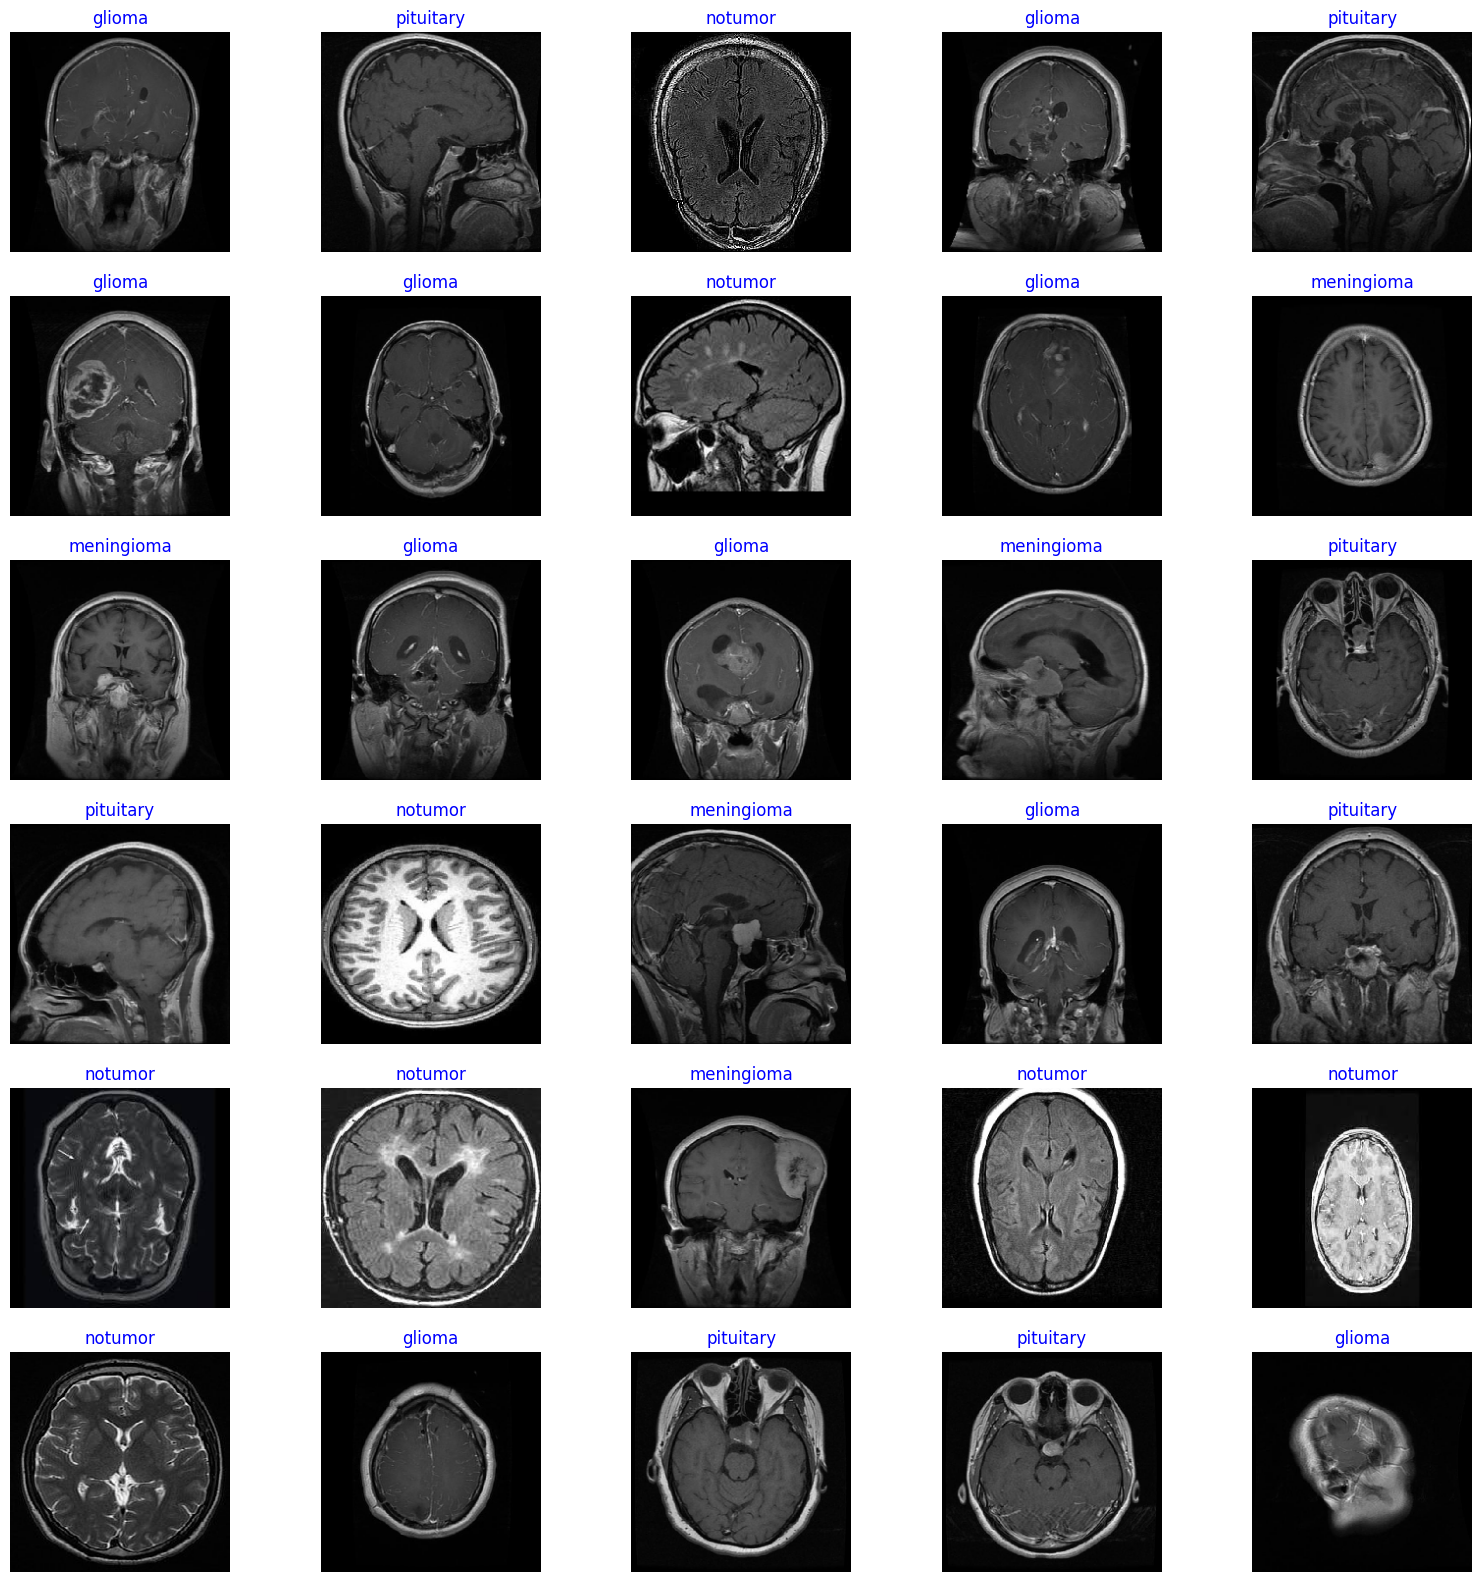

In [4]:
plotter = ImagePlotter(train_generator)
plotter.plot_images()

<br><br><br><br><br><br><br><br><br><br><br>

# Model Training :
<br><br>

In [5]:
filepath = 'best_modelVGG.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-5), loss='categorical_crossentropy',
              metrics=[metrics.CategoricalAccuracy()])


# Train the model
epochs = 25
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[checkpoint]
)

Epoch 1/25
178/178 [==============================] - ETA: 0s - loss: 0.8713 - categorical_accuracy: 0.6600
Epoch 00001: val_loss improved from inf to 0.69062, saving model to best_modelVGG.h5
178/178 [==============================] - 692s 4s/step - loss: 0.8713 - categorical_accuracy: 0.6600 - val_loss: 0.6906 - val_categorical_accuracy: 0.7598
Epoch 2/25
178/178 [==============================] - ETA: 0s - loss: 0.4935 - categorical_accuracy: 0.8322
Epoch 00002: val_loss improved from 0.69062 to 0.57730, saving model to best_modelVGG.h5
178/178 [==============================] - 689s 4s/step - loss: 0.4935 - categorical_accuracy: 0.8322 - val_loss: 0.5773 - val_categorical_accuracy: 0.7830
Epoch 3/25
178/178 [==============================] - ETA: 0s - loss: 0.3991 - categorical_accuracy: 0.8630
Epoch 00003: val_loss improved from 0.57730 to 0.49526, saving model to best_modelVGG.h5
178/178 [==============================] - 696s 4s/step - loss: 0.3991 - categorical_accuracy: 0.8630

Epoch 25/25
178/178 [==============================] - ETA: 0s - loss: 0.1067 - categorical_accuracy: 0.9678
Epoch 00025: val_loss did not improve from 0.11859
178/178 [==============================] - 746s 4s/step - loss: 0.1067 - categorical_accuracy: 0.9678 - val_loss: 0.1196 - val_categorical_accuracy: 0.9616


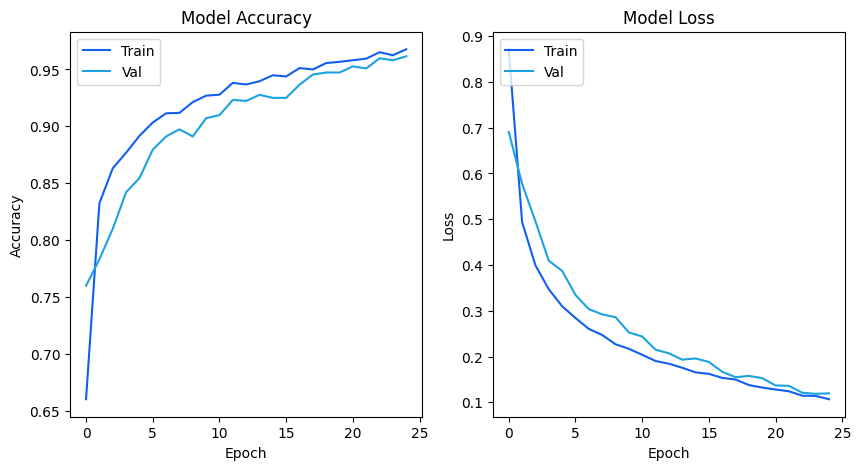

In [6]:
plothist = TrainingHistoryPlotter(history)
plothist.plot()

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1028      
Total params: 21,138,500
Trainable params: 6,423,812
Non-trainable params: 14,714,688
_________________________________________________________________


In [8]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')

40/40 [==============================] - 133s 3s/step - loss: 0.1638 - categorical_accuracy: 0.9461
Test loss: 0.16377191245555878, Test accuracy: 0.946093738079071


## And this is VGG16 trained model... I am working on many architectures and I will see the best